# Linear Regression

In this notebook, We will be practicing Linear Regression using sample dataset.

### Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Simple Linear Regression

### Creating Dataset

In [96]:
df_simple = pd.read_csv('advertising.csv',usecols=['TV','Sales'])

In [97]:
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [98]:
df_simple.shape

(200, 2)

In [99]:
df_simple.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [100]:
df_simple.isnull().sum()

TV       0
Sales    0
dtype: int64

In [101]:
lr = LinearRegression()

In [102]:
X = df_simple[["TV"]]
y = df_simple["Sales"]

### Train Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
lr.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred = lr.predict(X_test)

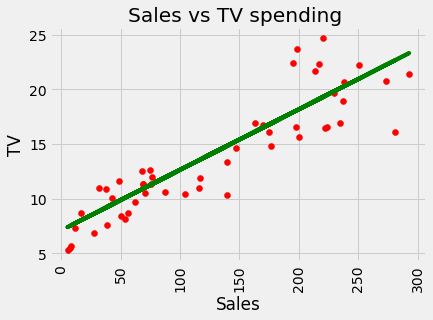

In [106]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Sales vs TV spending ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

### R Squared Score

In [107]:
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score is : 79.7 %


#### *Simple Linear Regression Formula* : **y = b0 + b1 * x1**

The simple linear regression model is essentially a linear equation of the form y = b0 + b1*x1; where y is the dependent variable (outcome), x1 is the independent variable (predictor), b1 is the slope of the line; also known as regression coefficient and b0 is the intercept; labeled as constant.

#### Finding Intercept and Coefficient

In [108]:
lr.intercept_

7.098853680118275

In [109]:
lr.coef_[0]

0.05538653085519158

- Let's find out sales number if we spend **300 $** on TV advertising

**by using our Simple Linear Regression**

In [110]:
print("Predicted Sales :",round(lr.predict([[300]])[0],2))

Predicted Sales : 23.71


**by using ıntercept and coefficient**

Recall the equation is y = b_0 + b_1 * x1

Let's put each value into the equationm

In [111]:
y = lr.intercept_ + lr.coef_* 300

In [112]:
print("Predicted Sales :",round(y[0],2))

Predicted Sales : 23.71


- We see the same value as you can see above . Linear regression does the same job for each observation.

## Multiple Linear Regression

In [113]:
df_multiple = pd.read_csv('advertising.csv')

In [114]:
df_multiple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [115]:
df_multiple.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Missing Values

In [116]:
df_multiple.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [117]:
X = df_multiple[["TV","Radio","Newspaper"]]
y = df_multiple["Sales"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [119]:
lr = LinearRegression()

In [120]:
lr.fit(X_train,y_train)

LinearRegression()

### Interpreting Results with Adjusted R Squared

- We already know how R Squared can help us in Model Evaluation. However, there is one major disadvantage of using R Squared. The value of R Squared never decreases. If you are wondering why does it need to decrease since it will only result in a  bad model, there is a catch, adding new independent variables will result in an increased value of R Squared. This is a major flow as R Squared will suggest that adding new variables irrespective of whether they are really significant or not, will increase the value.

In [122]:
y_pred = lr.predict(X_test)

In [123]:
r_squared = r2_score(y_test,y_pred)

In [135]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [136]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 91.02 R Squared: % 91.16


#### *Multiple Linear Regression Formula* : **y = b0 + b1 * x1  + b2 * x2  + b3 * x3**

In [38]:
print("Intercept is ",lr.intercept_,"and Coefficients are", lr.coef_)

Intercept is  4.741842244124566 and Coefficients are [0.05461383 0.09975946 0.00430495]


In [39]:
lr.coef_

array([0.05461383, 0.09975946, 0.00430495])

- Coefficient for TV : **0.05444578**
- Coefficient for Radio : **0.10700123**
-  Coefficient for Newspaper : **0.00033566**

#### Let's find out how many units we will sell if we spend ;
- 200 Dollars on TV advertising
- 50  Dollars on Radio
- 20  Dollars on Newspaper

**by using our Linear Regression**

In [40]:
round(lr.predict([[200,50,20]])[0],2)

20.74

**by using ıntercept and coefficients**

In [29]:
y = lr.intercept_ + lr.coef_[0] * 200 + lr.coef_[1] * 50 + lr.coef_[2] * 20

In [30]:
round(y,2)

20.74

### Thank you ###
*Hope this notebook helped you understand Linear Regression*

#### **Ugur Savci**

#### *Let's connect* !

#### [Linkedin](https://www.linkedin.com/in/ugur-savci/) |  [Medium](https://medium.com/@ugursavci)